In [3]:
from __future__ import print_function, division     # Python 2/3 compatibility
from skimage import io                              # utilities to read and write images in various formats
import numpy as np                                  # array manipulation package
import matplotlib.pyplot as plt                      # plotting package
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 8)            # set default figure size
plt.rcParams['image.cmap'] = 'gray'                 # set default colormap to gray

# Assignment 4 : Image Restoration and Color Processing

The following programming assignment involves the task of image restoration in the spatial and frequency domain, as well as color image processing.

**Please, follow carefully the submission instructions given in the end of this notebook.** You are encouraged to seek information in other places than the course book and lecture material but remember **list all your sources under references**.

If you experience problems that you cannot solve using the course material or the Python documentation, or have any questions regarding the programming assignments, please do not hesitate to contact the course assistant by sending an e-mail at dip@unioulu.oulu.fi. You can also join in for the Q & A session (schedule is given on the course page in Moodle) for this assignment.

**Please, fill in your personal details below.**

# Personal details:

* **Name(s) and student ID(s): Marwa Bibi (SID# 2407704), Haseeb Ur Rehman (SID# 2315255)** 
* **Contact information: Marwa.Bibi@student.oulu.fi, Haseeb.Rehman@student.oulu.fi** 

# 1. Image enhancement in spatial domain

The gray-scale image `test_gauss_noise.jpg` contain different types of noise. Your task is to perform image enhancement in spatial domain so that the noise is reduced. Please note that you cannot to restore the original image (i. e. remove the noise completely). For instance, __[`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html)__ and __[`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html)__ packages provide useful tools for filtering the noise types.

### Additive Gaussian noise

The image `test_gauss_noise.jpg` suffers from additive Gaussian noise:

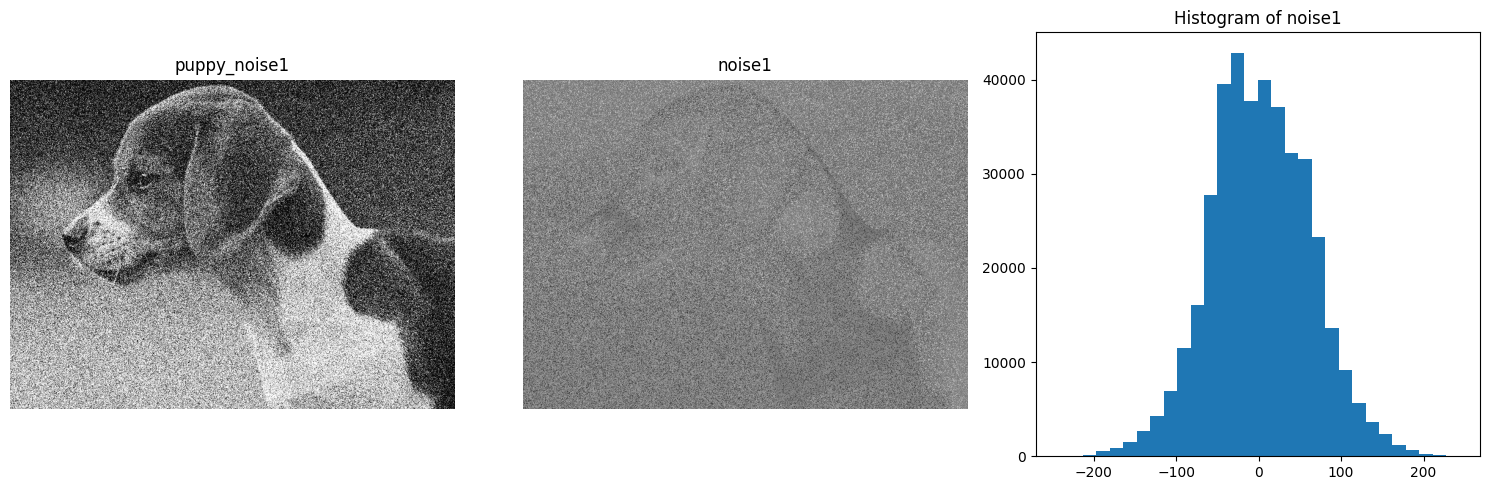

In [5]:
# read image the original 'test_noiseless.jpg' and its noisy version 'test_gauss_noise.jpg'
orig = io.imread('test_noiseless.jpg').astype('int32')
noisy1 = io.imread('test_gauss_noise.jpg')

# extract the additive noise from the noisy image by subtracting the original image from the noisy one
noise1 = noisy1.astype('int32') - orig

# display the noisy image, noise and histogram of the noise
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(noisy1, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[0].set_title('puppy_noise1')
ax[0].axis('off')
ax[1].imshow(noise1, cmap=plt.get_cmap('gray'))
ax[1].set_title('noise1')
ax[1].axis('off')
ax[2].hist(noise1.flatten(), bins=30, fc='black')
ax[2].set_title('Histogram of noise1')
fig.tight_layout()

**1.1. Perform image enhancement on the `test_gauss_noise.jpg` image using a `3x3` mean filter and compute the root mean squared error (RMSE) with the original image before and after filtering the noise. Print the RMSE values. Then, display the noisy, enhanced and original image in the same figure.**

Hint: You can perform the filtering by first constructing the `3x3` mean filter mask (`NumPy array`) and then convolving the image with it using e.g. __[`scipy.signal.convolve2d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)__ function. Please note the __[difference in (integer) division between Python versions 2 and 3](https://stackoverflow.com/questions/21316968/division-in-python-2-7-and-3-3)__.

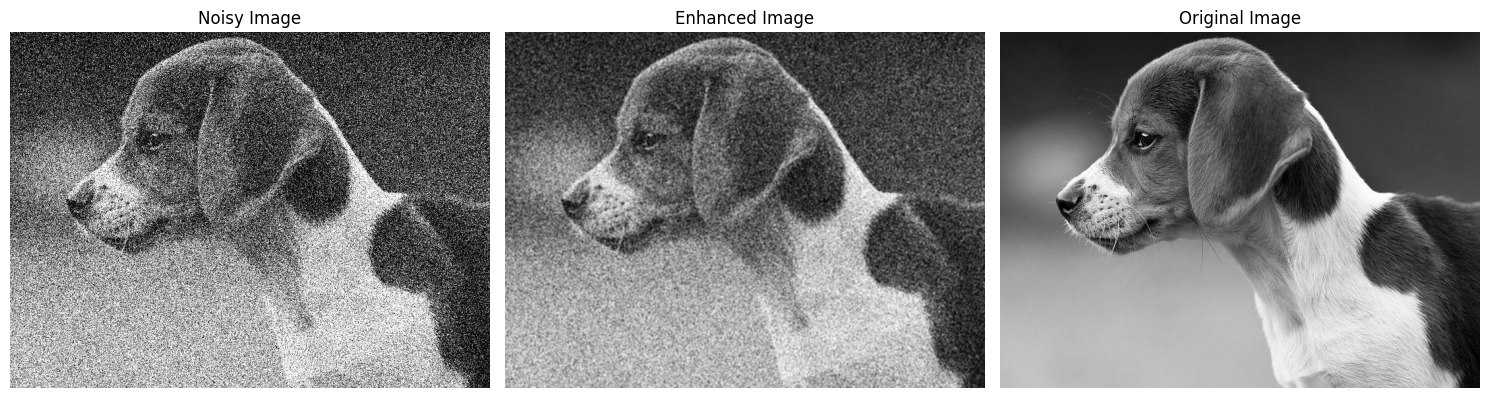

RMSE before enhancement: 60.63
RMSE after enhancement: 24.28


In [7]:
from scipy import signal

# Read the original and noisy images
orig = io.imread('test_noiseless.jpg').astype('int32')
noisy1 = io.imread('test_gauss_noise.jpg').astype('int32')

# construct mean filter mask
mean_filter = np.ones((3, 3)) / 9.0
# print(mean_filter)

# convolve the noisy image with the constructed filter mask
enhanced_image = signal.convolve2d(noisy1, mean_filter, mode='same', boundary='symm')

# Ensure the enhanced image is in the valid range [0, 255]
enhanced_image = np.clip(enhanced_image, 0, 255).astype('uint8')

# Compute RMSE before and after enhancement
def compute_rmse(img1, img2):
    return np.sqrt(np.mean((img1 - img2) ** 2))

rmse_before = compute_rmse(orig, noisy1)
rmse_after = compute_rmse(orig, enhanced_image)

# display the noisy, enhanced and original images
fig, ax= plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(noisy1, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[0].set_title('Noisy Image')
ax[0].axis('off')
ax[1].imshow(enhanced_image, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[1].set_title('Enhanced Image')
ax[1].axis('off')
ax[2].imshow(orig, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[2].set_title('Original Image')
ax[2].axis('off')

fig.tight_layout()
plt.show()


# print RMSE before and after enhancement
print(f"RMSE before enhancement: {rmse_before:.2f}")
print(f"RMSE after enhancement: {rmse_after:.2f}")



**1.2. Perform image enhancement on the `test_gauss_noise.jpg` image a `3x3` __[median filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)__ and compute the RMSE with the original image before and after filtering the noise. Then, display the noisy, enhanced and original image in the same figure.**

In [ ]:
from scipy.ndimage import median_filter

# apply 3x3 median filter on the noisy image image

# display the noisy, enhanced and original images

# print RMSE before and after enhancement

**1.3. Perform image enhancement on the `test_gauss_noise.jpg` image using a `5x5` __[Wiener filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.wiener.html)__ and compute the RMSE with the original image before and after filtering the noise. Then, display the noisy, enhanced and original image in the same figure. Please note that you need to convert the input image into `float64` using `astype('float64')` before applying __[`scipy.signal.wiener()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.wiener.html)__ function!**

In [ ]:
# apply 5x5 Wiener filter on the noisy image
# first convert the input image to float64 using 'astype('float64')'!

# display the noisy, enhanced and original images

# print RMSE before and after enhancement

**1.4. Finally, display the three images obtained with mean, median and Wiener filters in the same figure.**

In [ ]:
# display the mean, median and Wiener filtered images


**Which method gave the best result? Why??**

`Write your answer here...`

# 2. Image enhancement in frequency domain

In [ ]:
from scipy import fftpack

# read noisy image 'test_periodic_noise.jpg' and compute its Fourier transform (see Assignment #3)
periodic = io.imread('test_periodic_noise.jpg')
periodic_fft = fftpack.fftshift(fftpack.fft2(periodic))

# display the noisy image and the magnitude of its Fourier transform in the same figure
fig, ax = plt.subplots(1, 2)
ax[0].imshow(periodic, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[0].set_title('Periodic perturbation')
ax[0].axis('off')
ax[1].imshow(np.log(np.abs(periodic_fft)+1), cmap=plt.get_cmap('gray'))
ax[1].set_title('Magnitude of the FFT')
fig.tight_layout()

The image `test_periodic_noise.jpg` contains a periodic, i.e. sinusoidal, perturbation (see e.g. Section 5.2.3 in course book). You task is to remove the noise as well as you can. In practice, this consists of two main steps 1) locating the noise in the frequency domain, and 2) filtering the perturbation frequency using a proper filter.

Let's take first a look at what a 2D sinusoidal signal looks like in the 2D Fourier space by plotting three signals with different frequencies, `f=2`, `f=4` and `f=8` and their Fourier transforms (FT):

In [ ]:
# sample (x,y) image coordinate space linearly
nx = 100; ny = 100;
x = np.linspace(-1, 1, nx);
y = np.linspace(-1, 1, ny); 
[X, Y] = np.meshgrid(x, y);

# plot the three 2D sinusoids and the magnitudes of their FTs
fig, ax = plt.subplots(2, 3, figsize=(15,10))

f = 2;                 
z = np.sin(2*np.pi*f*X);
ax[0,0].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,0].axis('off')
ax[0,0].set_title('sinusoid of frequency f = 2')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,0].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,0].axis('off')
ax[1,0].set_title('magnitude of the respective FT')

f = 4;                 
z = np.sin(2*np.pi*f*X);
ax[0,1].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,1].axis('off')
ax[0,1].set_title('sinusoid of frequency f = 4')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,1].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,1].axis('off')
ax[1,1].set_title('magnitude of the respective FT')

f = 8;                 
z = np.sin(2*np.pi*f*X);
ax[0,2].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,2].axis('off')
ax[0,2].set_title('sinusoid of frequency f = 8')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,2].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,2].axis('off')
ax[1,2].set_title('magnitude of the respective FT')
fig.tight_layout()

As you can see, a horizontal 2D sinusoid corresponds to two horizontal peaks symmetric to the zero frequency in the magnitude of the Fourier domain and the higher the frequency the further away these peaks are from the origo.

Now, let's take a look at what happens if we rotate the horizontal 2D sinusoid 15, 45 and 75 degrees:

In [ ]:
# plot rotated 2D sinusoids and the magnitudes of their FTs
fig, ax = plt.subplots(2, 3, figsize=(15,10))

theta = 15*np.pi/180;
z = np.sin(2*np.pi*f*(Y*np.sin(theta) + X*np.cos(theta)));
ax[0,0].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,0].axis('off')
ax[0,0].set_title('sinusoid tilted at angle 15')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,0].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,0].axis('off')
ax[1,0].set_title('magnitude of the respective FT')

theta = 45*np.pi/180;
z = np.sin(2*np.pi*f*(Y*np.sin(theta) + X*np.cos(theta)));
ax[0,1].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,1].axis('off')
ax[0,1].set_title('sinusoid tilted at angle 45')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,1].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,1].axis('off')
ax[1,1].set_title('magnitude of the respective FT')

theta = 75*np.pi/180;
z = np.sin(2*np.pi*f*(Y*np.sin(theta) + X*np.cos(theta)));
ax[0,2].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,2].axis('off')
ax[0,2].set_title('sinusoid tilted at angle 75')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,2].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,2].axis('off')
ax[1,2].set_title('magnitude of the respective FT')
fig.tight_layout()

Due to the properties of the 2D FT, the corresponding frequency peaks rotate exactly the same manner.

Now, it should be clear(er) what the periodic perturbation we are dealing with looks like in the FT of the noisy image, i.e. where to look for it. Can you now spot the reason for the periodic perturbation in the spectral image of the image `test_periodic_noise.jpg`?

In [ ]:
# display the magnitude of the FT
fig, ax = plt.subplots()
ax.imshow(np.log(np.abs(periodic_fft)+1), cmap=plt.get_cmap('gray'))
ax.set_title('magnitude of the FT of the image periodic.tif')
fig.tight_layout()

This kind of periodic perturbation should be filtered with a notch filter. However, in the following, an ideal band-reject filter is used for the sake of simplicity. So perform the following operations in the reserved code cells in order to remove the periodic perturbation from the test image.

(Please note that you can also implement a notch filter instead if you prefer.)

**2.1. Modify the ideal lowpass (or highpass) filter code from Assignment \#3 to construct an ideal band-reject filter `Hbr` and display band-reject filters with cut-off frequency `D0=0.2` and bandwidths `W=0.05` and `W=0.01` in the same figure.**

Hint: See lecture notes or course book what an ideal band-reject filter looks like. An ideal band-reject filter is just a combination of lowpass and highpass filtering, so now you need to combine the conditions `<` and `>` into one filter in order to reject frequencies within the narrow band.

In [ ]:
# create matrix D with absolute frequency values and size of the FT of the image 'test_periodic_noise.jpg' 


# set cut-off frequency 'D0' to 0.2

# set the bandwidth 'W' to 0.05

# initialize filter matrix 'Hbr' with ones (same size as the fft2 of the test image)


# set frequencies > or < the threshold to zero, other remain unaltered

# do the same to construct ideal band-reject filter with 'W' of 0.01

# display both filters with different bandwidths in the same figure


**2.2. Find the perturbation frequency in the magnitude of the FT that should be filtered out and filter the noisy image with a band-reject filter having proper `D0` and `W`. Then. display the reconstructed filtered image and the magnitude of its FT in the same figure.**

Hint: You should see two sharp peaks in the spectral image which should be filtered out. They are somewhat hard to spot but you should know where to look if you followed the introduction part of this assignment carefully. You can either try to determine the perturbation frequency: 

1. manually by trial and error, or 

2. automatically by finding the peak coordinates with __[`skimage.feature.peak_local_max()`](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.peak_local_max)__ function and picking the corresponding relative frequency from the frequency matrix `D` based on the found peak locations.

Please note that you will receive the same amount of points no matter which of the two approaches you choose!

In [ ]:
from skimage.feature import peak_local_max

# find perturbation frequency 'D0' manually or automatically

# set frequencies within a _narrow_ reject band 'W' to zero, other remain unaltered

# apply the ideal band-reject filter to fft the test image

# reconstruct the enhanced image (see Assignment #2)

# display the enhanced image and the magnitude of its FT

**2.3. Finally, display the noisy image `test_periodic_noise.jpg` and the enhanced image in the same figure.**

In [ ]:
# display noisy and "restored" image


# 3. Color Image Processing

The objective in this task is to work with color images. We will look at various color models, transform one model into another, and perform pixel-level operations on color images. The material required for these tasks can be obtained from the Chapter 6 of the lecture notes in Moodle, as well as from the Chapter 6 of the textbook on Digital Image Processing.

**3.1. Read the `fruits.jpg` image. Note, that the image is loaded in the RGB color model here. Your first task is to extract the R, G and B components. Display all the three components as separate images, in the same figure.**

In [1]:
# read image the original 'fruits.jpg' 

# Note the shape of the Numpy array `fruits`

# Extract R, G and B components from fruits

# Display the three components and the original image in the same figure


In this task, we will work with the two color models, viz., the **RGB** and the **HSI** models. The **RGB** model stands for Red ($R$), Green ($G$), Blue ($B$), where, each image pixel value is assigned the tuple ($R,G,B$). The **HSI** model stands for Hue ($H$), Saturation ($S$), Intensity ($I$), where each pixel value is specified as a tuple ($H, S, I$). The formula for converting **RGB** --> **HSI** is given in the textbook (see Chapter 6). The equations for computing $H$, $S$ and $I$ values for a pixel from its $R$, $G$ and $B$ values are given below

$H = \left\{\begin{matrix}
  \theta, \ B <= G \\ 
  360 - \theta, \ B > G \end{matrix}\right.$ where $\theta = \text{cos}^{-1} \left( \dfrac{\dfrac{1}{2} \left( (R-G) + (R-B) \right)}{[(R-G)^2 + (R-B)(G-B)]^{\dfrac{1}{2}}} \right)$

$S = 1 - \dfrac{3}{(R + G + B)}[\text{min}(R,G,B)]$,


$I = \dfrac{1}{3} (R + G + B)$

Note, that the $R$, $G$ and $B$ values have to be normalized and in the range $[0, 1]$.

**3.2. Now, write a code to compute Hue $H$, Saturation $S$ and Intensity $I$ for each pixel in the image colors.png.**
Hint: You will need to add a *very* small number such as $0.01$ to the denominator $R+G+B$ in computation for $S$, otherwise you will end up dividing by $0$ leading to warning.

In [ ]:
colors = io.imread('colors.png')

# Compute the Hue for each pixel


# Compute the saturation for each pixel


# Compute the Intensity for each pixel

# Display the three components and the original image in the same figure


# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

`Write your answer here...`

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

`Write your answer here...`

# References
`https://c3.ai/glossary/data-science/root-mean-square-error-rmse/#:~:text=To%20compute%20RMSE%2C%20calculate%20the,square%20root%20of%20that%20mean.`

# Submission

1. Before submitting your work, **check that your notebook (code) runs from scratch** and reproduces all the requested results by clicking on the menu `Kernel -> Restart & Run All`! Also, check that you have answered all the questions written in **bold**.
2. Clear all outputs and variables, etc. by click on the menu `Kernel -> Restart & Clear Output`. This may (or will) reduce the file size of your deliverable a lot! 
3. Rename this Jupyter notebook to **`DIP_PA4_[student number(s)].ipynb`** (e.g. `DIP_PA4_1234567.ipynb` if solo work or `DIP_PA4_1234567-7654321.ipynb` if pair work)